### Group members (first and last names):
- ####  *Abdelhak Kermia*
- #### *Emilie Virginie Steffen*
- #### *Jean-Pierre Brog*

# Introduction
In this exercise, you’ll dive into the core ideas behind Convolutional Neural Networks (CNNs) and build a deeper understanding of how they work, both conceptually and in code.

You’ll start by answering a few theory questions to test your understanding of key components like convolution, padding, stride, and max pooling. Then, you’ll apply that knowledge by manually computing the output of a convolutional layer and a max pooling layer, just like a CNN does under the hood.

Finally, you’ll put it all together by implementing your own CNN model in PyTorch and experimenting with its architecture to see how different design choices affect performance.


---
## How to pass the assignment?
Below, you will find the exercise questions. Each question that awards points is numbered and displays the available points in this format: **(0 pts)**.

### Answering Questions
- Provide your answers in the cell directly below each question.
- Use **Markdown** for text-based answers (in **English**).
- Use **code cells** for implementations.
- **Incomplete or incorrect answers receive 0 points.** Partial credit may be awarded at the teacher's discretion.
- Overly detailed answers do not grant extra points. Stick to what is asked.

### Critical Thinking Questions and Bonus Exercises
- Some questions are marked with a 🧠 (Critical Thinking) or a ⭐ (Bonus Exercise). These are for self-reflection and extra practice.
- They are **optional** and do **not** award any points.
- Answering them can help reinforce your understanding.

### Important Rules
- **You may only use packages that have been presented in the assignments.** Using additional packages will result in **0 points**.
- Use of Datasets
  - Follow the dataset instructions carefully.
  - **If no new dataset is provided, continue using the one from the previous question.** Switching datasets without instruction will result in **0 points**.
- Code that does not run correctly will result in a **50% deduction** of the points for that question. Ensure your code is functional before submission.

### Important Notes
- Save your work frequently! (Ctrl + S)
- Before submitting, `Restart Session and Run All` cells to ensure everything works correctly.
- **You need at least 20 points out of 30 (66%) to pass ✅**
---

In [1]:
points = 30

# 1. Convolutional Neural Network Fundamentals (12 points)

Before diving into code, let's test your understanding of convolutional neural networks with these questions. For each topic, identify which statements are TRUE ✅ and which are FALSE ❌. Each question may have 1, 2, 3, or 4 correct answers.

- 4 correct answers: 2 points
- 3 correct answers: 1 point
- 2 or fewer correct answers: 0 points

💡 In Google Colab, you can easily add emojis to markdown cells by typing `:` followed by the emoji's name. For example, typing `:light-bulb` will display a light bulb emoji. This feature is also available as an extension in many IDEs.

❗ **TIP:** If a term is unfamiliar to you, look it up in [Google's ML Glossary](https://developers.google.com/machine-learning/glossary) for a simple explanation. 

#### 1.1 **(2pts) Which of the following statements about convolutional layers are true?**
 A. They are used to detect spatial features like edges and textures. ✅

 B. They reduce the number of channels in the input tensor. ❌

 C. They slide learnable filters over the input image. ✅

 D. They are typically placed after linear layers. ❌



#### 1.2 **(2pts) Which of these are advantages of using max pooling layers?**
 A. They help reduce overfitting by introducing noise. ❌

 B. They increase the number of parameters. ❌

 C. They reduce the spatial dimensions of feature maps. ✅

 D. They introduce translation invariance. ✅





#### 1.3 **(2pts) Why do we often use flattening before passing data to a linear (fully connected) layer in CNNs?**
 A. Because linear layers expect 1D input tensors. ✅

 B. To reduce the number of parameters in the network. ❌

 C. To allow gradients to flow backward during training. ❌

 D. To convert 2D spatial data into 1D vector format. ✅



#### 1.4 **(2pts) What are the benefits of using the ReLU (Rectified Linear Unit) activation function?**
 A. It introduces non-linearity into the model. ✅

 B. It prevents vanishing gradients better than sigmoid or tanh. ✅

 C. It squashes inputs to a range between 0 and 1. ❌

 D. It is computationally efficient. ✅



#### 1.5 **(2pts) Which statements about dropout are true?**
 A. Dropout randomly sets a portion of neurons to zero during training. ✅

 B. Dropout helps reduce overfitting.  ✅

 C. Dropout improves performance on the training set. ❌

 D. Dropout is typically used during both training and inference. ❌



#### 1.6 **(2pts) Which of the following are true about the structure of a typical CNN architecture?**
 A. It starts with fully connected layers and ends with convolutional layers. ❌

 B. It often follows the pattern: Conv → ReLU → Pooling → FC. ✅

 C. It usually requires flattening before fully connected layers. ✅

 D. It always requires dropout after every layer. ❌

---
# 2. Hands-On / Math Questions (4 points)
All math answers must be formatted with $\LaTeX$.

#### 2.1 **(2pts) A neural network consists of one convolutional layer with two filters ($W_1$ and $W_2$) and uses an identity activation function (i.e., no non-linearity). You're given two convolutional kernels and an input matrix ($X$):**

- Assume no padding and a stride of 1.
- Manually compute the outputs $f_1$ and $f_2$ by applying $W_1$ and $W_2$ to the input matrix $X$.
  - Indicate the expected output size.
- For each individual value in both output matrices, show your calculation in $\LaTeX$.
  - If you choose to skip or generalize any calculation, explicitly state which entries you skipped and why.
- After computing, clearly present the final output matrices for both filters, using $\LaTeX$:


$$
W_1 =
\begin{pmatrix}
-1 & -1 & -1 \\
 2 &  2 &  2 \\
-1 & -1 & -1
\end{pmatrix}
\quad \quad
W_2 =
\begin{pmatrix}
-1 & 2 & -1 \\
-1 & 2 & -1 \\
-1 & 2 & -1
\end{pmatrix}
\quad \quad
X =
\begin{pmatrix}
2 & 2 & 2 & 2 & 2 \\
3 & 3 & 3 & 3 & 3 \\
1 & 1 & 1 & 1 & 1 \\
3 & 3 & 3 & 3 & 3 \\
2 & 2 & 2 & 2 & 2
\end{pmatrix}
$$


**Expected Output Matrix Size for f1 :** -> f1 is a (3, 3) matrix
$$
\begin{align*}
& \text{Output size} = \left\lfloor \frac{n + 2p - k}{s} \right\rfloor + 1 \\
& \text{with s= stride, p=padding, k= filter size, n = input size, o = output size} \\
& \\
& \text H_{\text{out}} = \frac{\text{input height} - \text{filter height}}{\text{stride}} + 1 = \frac{5 - 3}{1} + 1 = 3 \\[1em]
& \text W_{\text{out}} = \frac{\text{input width} - \text{filter width}}{\text{stride}} + 1 = \frac{5 - 3}{1} + 1 = 3 \\[1em]
\end{align*}
$$

**Expected Output Matrix Size for f2:**  -> f2 is a (3, 3) matrix
$$
\begin{align*}
& \text H_{\text{out}} = \frac{5 - 3}{1} + 1 = 3 \\[1em]
& \text W_{\text{out}} = \frac{5 - 3}{1} + 1 = 3 \\[1em]
\end{align*}
$$


**Output Calculations for f1:**
$$
\begin{aligned}
\text f_1(1, 1) & = (-1 \cdot 2 + -1 \cdot 2 + -1 \cdot 2) + (2 \cdot 3 + 2 \cdot 3 + 2 \cdot 3) + (-1 \cdot 1 + -1 \cdot 1 + -1 \cdot 1) = -6 + 18 - 3 = 9 \\
\text f_1(1, 2) & = (-1 \cdot 2 + -1 \cdot 2 + -1 \cdot 2) + (2 \cdot 3 + 2 \cdot 3 + 2 \cdot 3) + (-1 \cdot 1 + -1 \cdot 1 + -1 \cdot 1) = -6 + 18 - 3 = 9 \\
\text f_1(1, 3) & = (-1 \cdot 2 + -1 \cdot 2 + -1 \cdot 2) + (2 \cdot 3 + 2 \cdot 3 + 2 \cdot 3) + (-1 \cdot 1 + -1 \cdot 1 + -1 \cdot 1) = -6 + 18 - 3 = 9 \\
& \\
\text f_1(2, 1) & = (-1 \cdot 3 + -1 \cdot 3 + -1 \cdot 3) + (2 \cdot 1 + 2 \cdot 1 + 2 \cdot 1) + (-1 \cdot 3 + -1 \cdot 3 + -1 \cdot 3) = -9 + 6 - 9 = -12 \\
\text f_1(2, 2) & = (-1 \cdot 3 + -1 \cdot 3 + -1 \cdot 3) + (2 \cdot 1 + 2 \cdot 1 + 2 \cdot 1) + (-1 \cdot 3 + -1 \cdot 3 + -1 \cdot 3) = -9 + 6 - 9 = -12 \\
\text f_1(2, 3) & = (-1 \cdot 3 + -1 \cdot 3 + -1 \cdot 3) + (2 \cdot 1 + 2 \cdot 1 + 2 \cdot 1) + (-1 \cdot 3 + -1 \cdot 3 + -1 \cdot 3) = -9 + 6 - 9 = -12 \\
& \\
\text f_1(3, 1) & = (-1 \cdot 1 + -1 \cdot 1 + -1 \cdot 1) + (2 \cdot 3 + 2 \cdot 3 + 2 \cdot 3) + (-1 \cdot 2 + -1 \cdot 2 + -1 \cdot 2) = -3 + 18 - 6 = 9 \\
\text f_1(3, 2) & = (-1 \cdot 1 + -1 \cdot 1 + -1 \cdot 1) + (2 \cdot 3 + 2 \cdot 3 + 2 \cdot 3) + (-1 \cdot 2 + -1 \cdot 2 + -1 \cdot 2) = -3 + 18 - 6 = 9 \\
\text f_1(3, 3) & = (-1 \cdot 1 + -1 \cdot 1 + -1 \cdot 1) + (2 \cdot 3 + 2 \cdot 3 + 2 \cdot 3) + (-1 \cdot 2 + -1 \cdot 2 + -1 \cdot 2) = -3 + 18 - 6 = 9
\end{aligned}
$$

**Output Calculations for f2:**
$$
\begin{aligned}
\text f_2(1, 1) &= (-1 \cdot 2 + 2 \cdot 2 + -1 \cdot 2) + (-1 \cdot 3 + 2 \cdot 3 + -1 \cdot 3) + (-1 \cdot 1 + 2 \cdot 1 + -1 \cdot 1) = 0 + 0 + 0 = 0 \\
\text f_2(1, 2) &= (-1 \cdot 2 + 2 \cdot 2 + -1 \cdot 2) + (-1 \cdot 3 + 2 \cdot 3 + -1 \cdot 3) + (-1 \cdot 1 + 2 \cdot 1 + -1 \cdot 1) = 0 + 0 + 0 = 0 \\
\text f_2(1, 3) &= (-1 \cdot 2 + 2 \cdot 2 + -1 \cdot 2) + (-1 \cdot 3 + 2 \cdot 3 + -1 \cdot 3) + (-1 \cdot 1 + 2 \cdot 1 + -1 \cdot 1) = 0 + 0 + 0 = 0 \\
& \\
\text f_2(2, 1) &= (-1 \cdot 3 + 2 \cdot 3 + -1 \cdot 3) + (-1 \cdot 1 + 2 \cdot 1 + -1 \cdot 1) + (-1 \cdot 3 + 2 \cdot 3 + -1 \cdot 3) = 0 + 0 + 0 = 0 \\
\text f_2(2, 2) &= (-1 \cdot 3 + 2 \cdot 3 + -1 \cdot 3) + (-1 \cdot 1 + 2 \cdot 1 + -1 \cdot 1) + (-1 \cdot 3 + 2 \cdot 3 + -1 \cdot 3) = 0 + 0 + 0 = 0 \\
\text f_2(2, 3) &= (-1 \cdot 3 + 2 \cdot 3 + -1 \cdot 3) + (-1 \cdot 1 + 2 \cdot 1 + -1 \cdot 1) + (-1 \cdot 3 + 2 \cdot 3 + -1 \cdot 3) = 0 + 0 + 0 = 0 \\
& \\
\text f_2(3, 1) &= (-1 \cdot 1 + 2 \cdot 1 + -1 \cdot 1) + (-1 \cdot 3 + 2 \cdot 3 + -1 \cdot 3) + (-1 \cdot 2 + 2 \cdot 2 + -1 \cdot 2) = 0 + 0 + 0 = 0 \\
\text f_2(3, 2) &= (-1 \cdot 1 + 2 \cdot 1 + -1 \cdot 1) + (-1 \cdot 3 + 2 \cdot 3 + -1 \cdot 3) + (-1 \cdot 2 + 2 \cdot 2 + -1 \cdot 2) = 0 + 0 + 0 = 0 \\
\text f_2(3, 3) &= (-1 \cdot 1 + 2 \cdot 1 + -1 \cdot 1) + (-1 \cdot 3 + 2 \cdot 3 + -1 \cdot 3) + (-1 \cdot 2 + 2 \cdot 2 + -1 \cdot 2) = 0 + 0 + 0 = 0
\end{aligned}
$$

$$
f_1 =
\begin{pmatrix}
9 & 9 & 9 \\
-12 & -12 & -12 \\
9 & 9 & 9
\end{pmatrix}
\quad \quad
f_2 =
\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix}
\quad \quad
$$

<font color='red'> There are two filters on one input which means the output will be 3x3x2 (-1)

In [13]:
points-=1

#### ⭐ Examine the activations/outputs of the two neurons from 2.1. Discuss the reasons behind their differences. In particular, focus on the patterns observed both in the inputs and in the kernels. Go one step further and, based on your understanding, explain which types of features are likely being detected by each of the two kernels.

W1 filters detects horizontal changes (variations along columns) and W2 detects vertical changes (variations along rows). The input  matrix X has only changes along the horizontal direction (columns), so only the f1 feature map will have non zero values. The feature map f2 won't show any activation since there are no vertical changes (the rows have constant values)

The two kernels/filters could be used to detect for examples edges, contour, contrast.

#### 2.2 **(2pts) Activate a $3 \times 3$ max pooling layer on the outputs of the two convolutions from your answer to question 2.1. Assume no padding.**

Since the f1, f2 are 3x3 matrix/tensor and the pooling layer is 3x3 matrix/tensor with no padding, it will give use the max value (1x1 scalar/tensor) of each of the two matrix:

**Outputs After 3×3 Max Pooling**

MaxPool($f_1$) = 9

MaxPool($f_2$) = 0

#### 🧠 Are the answers to the question above scalars? Why or why not?

Yes, they are scalars or tensor of rank 1 because there is no padding we have a 3x3 matrix on a 3x3 feature map (no sliding,striding possible) so only 1 value as output -> scalar.

---
# 3. Coding (14 points)

In [2]:
# These are the packages you'll need today
# If you're running on a local environment, make sure everything you need is installed :)

# Data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import random

# PyTorch libraries for deep learning
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Other libraries
from tqdm.notebook import tqdm

# Set random seed
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Set up device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


#### 3.1 **(2pts) Define and apply five different 3x3 convolution filters (identity, box blur, vertical edge detector, horizontal edge detector, and Laplacian filter) to an MNIST image.**

- [Create an empty tensor](https://pytorch.org/docs/stable/generated/torch.empty.html) for filters using `torch.empty()`
  - The tensor should have dimensions that reflect the number of filters, the number of input channels (MNIST images are grayscale), and the size of each filter (3x3).
- Define 5 convolutional filters and assign them to the tensor `weight`.

```
## identity filter
weight[0, 0] = torch.tensor([
    [ 0., 0., 0. ],
    [ 0., 1., 0. ],
    [ 0., 0., 0. ]
])
## box blur / averaging filter
weight[1, 0] = torch.tensor([
    [ 1., 1., 1. ],
    [ 1., 1., 1. ],
    [ 1., 1., 1. ]
])
## vertical edge detector
weight[2, 0] = torch.tensor([
    [ -1., 0., 1. ],
    [ -1., 0., 1. ],
    [ -1., 0., 1. ]
])
## horizontal edge detector
weight[3, 0] = torch.tensor([
    [ -1., -1., -1. ],
    [ 0., 0., 0. ],
    [ 1., 1., 1. ]
])
## laplacian filter / sharpening
weight[4, 0] = torch.tensor([
    [ 0., -1., 0. ],
    [ -1., 4., -1. ],
    [ 0., -1., 0. ]
])
```
You can use the following libraries: `torch`, `torch.nn.functional`, `torchvision.datasets`, `matplotlib`

100%|██████████| 9.91M/9.91M [00:00<00:00, 10.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 276kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.89MB/s]
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


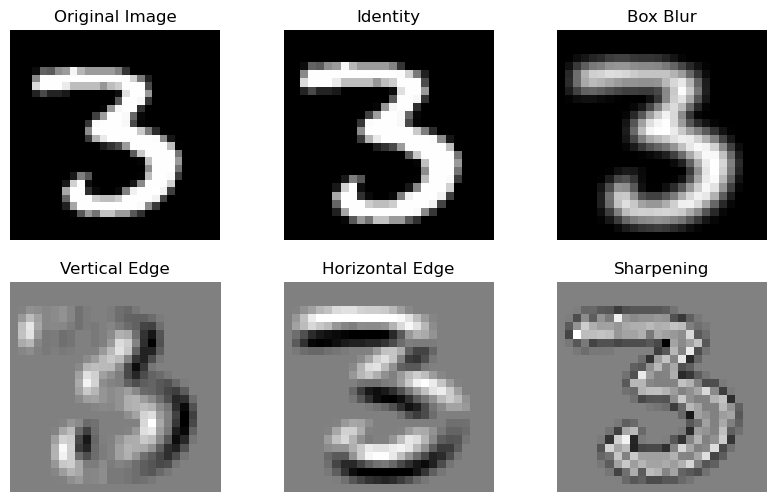

In [3]:
import torch.nn.functional as F

# load MNIST data from PyTorch
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# prepare input image
x = mnist_train.data[12].float().view(1, 1, 28, 28)

# define empty tensor to hold 5 conv filters
### YOUR CODE HERE ###
weight = torch.empty((5,1,3,3)) # 5 num filters, 1 num channel (3rgb,4rgba), 3 by 3 filter (3,3)  https://pytorch.org/docs/stable/generated/torch.empty.html  size (int...) – a sequence of integers defining the shape of the output tensor. Can be a variable number of arguments or a collection like a list or tuple.

# define convolutional filters
### YOUR CODE HERE ###
weight[0, 0] = torch.tensor([ # Identity filter
    [ 0., 0., 0. ],
    [ 0., 1., 0. ],
    [ 0., 0., 0. ]
])
weight[1, 0] = torch.tensor([ # Box blur / averaging filter
    [ 1., 1., 1. ],
    [ 1., 1., 1. ],
    [ 1., 1., 1. ]
]) / 9.0 # Normalize
weight[2, 0] = torch.tensor([ # Vertical edge detector
    [ -1., 0., 1. ],
    [ -1., 0., 1. ],
    [ -1., 0., 1. ]
])
weight[3, 0] = torch.tensor([ # Horizontal edge detector
    [ -1., -1., -1. ],
    [ 0., 0., 0. ],
    [ 1., 1., 1. ]
])
weight[4, 0] = torch.tensor([ # Laplacian filter / sharpening
    [ 0., -1., 0. ],
    [ -1., 4., -1. ],
    [ 0., -1., 0. ]
])
# perform convolution
y = F.conv2d(x, weight)

# visualize results
fig, axes = plt.subplots(2,3, figsize=(10, 6))
axes = axes.flatten()

axes[0].imshow(x[0,0].detach().numpy(), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

filters = ['Identity', 'Box Blur', 'Vertical Edge', 'Horizontal Edge', 'Sharpening']

for i in range(5):
    axes[i + 1].imshow(y[0,i].detach().numpy(), cmap='gray')
    axes[i + 1].set_title(filters[i])
    axes[i + 1].axis('off')


#### 3.2 **(6pts) Implement and Train a CNN for MNIST Classification in PyTorch.**

**Strictly follow the given architecture:**
- Conv2d Layer 1:
  - Input channels: 1, Output channels: 32, Kernel size: 3×3
- Activation: ReLU (applied in forward)
- MaxPool2d Layer 1:
  - Kernel size: 2×2, Stride: 2
- Conv2d Layer 2:
  - Input channels: 32, Output channels: 64, Kernel size: 3×3
- Activation: ReLU (applied in forward)
- MaxPool2d Layer 2:
  - Kernel size: 2×2, Stride: 2
- Flatten Layer: Flattens the tensor into a vector before feeding into the fully connected layer (applied in forward)
- Fully Connected (Linear) Layer 1:
  - Input features: 64×5×5, Output features: 128
- Activation: ReLU (applied in forward)
- Followed by Dropout (p = 0.5)
- Fully Connected (Linear) Output Layer:
  - Input features: 128, Output features: 10 (number of classes in MNIST)
- No activation function here (logits are passed to CrossEntropyLoss, which applies Softmax internally)

💡 **Hints:**
- Define all layers, including `nn.ReLU()` and `nn.Flatten()`, inside the `__init__` method.
- Use `nn.Sequential(...)` blocks where appropriate to organize related layers.
- Call all layers (including activations) in order in the `forward()` method.
- Make sure that the Max Pooling is applied after the ReLu activation function.

**Example for a `forward` pass block:**
```
        x = self.pool1(self.relu(self.conv1(x)))  # Apply Conv1 + ReLU + Pool1
```

⌛ **Training Tip:**
- On CPU, training takes ~1 minute per epoch. You may reduce to 5 epochs if 15 takes too long.
- On GPU, each epoch takes ~10 seconds.

You can use the following library: `torch.nn`

❓ **Help:** Check out this [example code](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html#convolutional-layers). Modify it so that you only use `torch.nn`.

In [4]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Convolutional layers //  https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html kernel_size (Union[int, tuple[int, int]]) 3 by 3 = 3 for square kernel if rectangular put tuple
        self.conv_layer1 = nn.Conv2d(1, 32, kernel_size = 3)
        self.conv_layer2 = nn.Conv2d(32, 64, kernel_size = 3)

        # Pooling layers  //  https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html kernel_size (Union[int, tuple[int, int]]) 3 by 3 = 3 for square kernel if rectangular put tuple
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2),stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2),stride=2)
        #self.pool2d = nn.MaxPool2d(kernel_size=(2, 2),stride=2) // at runtime, cannot change default arguments/attributes in forward ! Use the F.max_pool2d directly in forward to modify parameters or make multiple pool layers with different parameters.

        # Fully connected layers
        self.fc_layer1 = nn.Linear(64 * 5 * 5,128)
        self.fc_layer2 = nn.Linear(128, 10)

        # Flattening, activation and regularization
        self.flat = nn.Flatten(1)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(p=0.5)

    def forward(self,x):
        # Convolutional layers with relu activation and max pooling (downsampling)
        x = self.pool1(self.relu(self.conv_layer1(x)))
        x = self.pool2(self.relu(self.conv_layer2(x)))

        # Flattening and FC layers with relu activation and dropout (regularization)
        x = self.flat(x)
        x = self.drop(self.relu(self.fc_layer1(x)))
        x = self.fc_layer2(x)
        return x


In [5]:
# These functions were adapted from Deep Learning by Prof. Paolo Favaro, University of Bern

def train_epoch(model, train_dataloader, optimizer, loss_fn):
    losses = []
    correct_predictions = 0
    # Iterate mini batches over training dataset
    for features, labels in tqdm(train_dataloader):
        features = features.to(device)
        labels = labels.to(device)
        # Run predictions
        output = model(features)
        # Set gradients to zero
        optimizer.zero_grad()
        # Compute loss
        loss = loss_fn(output, labels)
        # Backpropagate (compute gradients)
        loss.backward()
        # Make an optimization step (update parameters)
        optimizer.step()
        # Log metrics
        losses.append(loss.item())
        predicted_labels = output.argmax(dim=1)
        correct_predictions += (predicted_labels == labels).sum().item()
    accuracy = 100.0 * correct_predictions / len(train_dataloader.dataset)
    # Return loss values for each iteration and accuracy
    mean_loss = np.array(losses).mean()
    return mean_loss, accuracy

def evaluate(model, dataloader, loss_fn):
    losses = []
    correct_predictions = 0
    with torch.no_grad():
        for features, labels in dataloader:
            features = features.to(device)
            labels = labels.to(device)
            # Run predictions
            output = model(features)
            # Compute loss
            loss = loss_fn(output, labels)
            # Save metrics
            predicted_labels = output.argmax(dim=1)
            correct_predictions += (predicted_labels == labels).sum().item()
            losses.append(loss.item())
    mean_loss = np.array(losses).mean()
    accuracy = 100.0 * correct_predictions / len(dataloader.dataset)
    # Return mean loss and accuracy
    return mean_loss, accuracy

def train(model, train_dataloader, val_dataloader, optimizer, n_epochs, loss_fn):
    # We will monitor loss functions as the training progresses
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(n_epochs):
        model.train()
        train_loss, train_accuracy = train_epoch(model, train_dataloader, optimizer, loss_fn)
        model.eval()
        val_loss, val_accuracy = evaluate(model, val_dataloader, loss_fn)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        print('Epoch {}/{}: train_loss: {:.4f}, train_accuracy: {:.4f}, val_loss: {:.4f}, val_accuracy: {:.4f}'.format(epoch+1, n_epochs,
                                                                                                      train_losses[-1],
                                                                                                      train_accuracies[-1],
                                                                                                      val_losses[-1],
                                                                                                      val_accuracies[-1]))
    return train_losses, val_losses, train_accuracies, val_accuracies

def plot(train_losses, val_losses, train_accuracies, val_accuracies, title):
    plt.figure()
    plt.plot(np.arange(len(train_losses)), train_losses)
    plt.plot(np.arange(len(val_losses)), val_losses)
    plt.legend(['train_loss', 'val_loss'])
    plt.xlabel('epoch')
    plt.xticks(np.arange(len(train_losses)), np.arange(1, len(train_losses)+1))
    plt.ylabel('loss value')
    plt.title('{}: Train/val loss'.format(title))

    plt.figure()
    plt.plot(np.arange(len(train_accuracies)), train_accuracies)
    plt.plot(np.arange(len(val_accuracies)), val_accuracies)
    plt.legend(['train_acc', 'val_acc'])
    plt.xlabel('epoch')
    plt.xticks(np.arange(len(train_losses)), np.arange(1, len(train_losses)+1))
    plt.ylabel('accuracy')
    plt.title('{}: Train/val accuracy'.format(title))


In [6]:
# data loaders
train_loader = DataLoader(mnist_train, batch_size=128, shuffle=True, num_workers=0)
val_loader = DataLoader(mnist_test, batch_size=128, shuffle=False, num_workers=0)

# instantiate the model
model = CNNModel()
model.to(device)


CNNModel(
  (conv_layer1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_layer1): Linear(in_features=1600, out_features=128, bias=True)
  (fc_layer2): Linear(in_features=128, out_features=10, bias=True)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (relu): ReLU()
  (drop): Dropout(p=0.5, inplace=False)
)

In [7]:
# loss, optimizer, epochs
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)
n_epochs = 15 # you can lower this if it's taking too long to run


In [8]:
# train model
train_losses, val_losses, train_acc, val_acc = train(model, train_loader, val_loader, optimizer, n_epochs, criterion)


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1/15: train_loss: 0.3594, train_accuracy: 88.9967, val_loss: 0.0724, val_accuracy: 97.7300


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 2/15: train_loss: 0.1071, train_accuracy: 96.8850, val_loss: 0.0436, val_accuracy: 98.5200


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 3/15: train_loss: 0.0790, train_accuracy: 97.7017, val_loss: 0.0322, val_accuracy: 98.8700


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 4/15: train_loss: 0.0633, train_accuracy: 98.1350, val_loss: 0.0291, val_accuracy: 99.0100


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 5/15: train_loss: 0.0562, train_accuracy: 98.3450, val_loss: 0.0300, val_accuracy: 99.0300


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 6/15: train_loss: 0.0471, train_accuracy: 98.6133, val_loss: 0.0268, val_accuracy: 99.1200


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 7/15: train_loss: 0.0402, train_accuracy: 98.8083, val_loss: 0.0248, val_accuracy: 99.1600


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 8/15: train_loss: 0.0382, train_accuracy: 98.8750, val_loss: 0.0242, val_accuracy: 99.1400


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 9/15: train_loss: 0.0331, train_accuracy: 98.9650, val_loss: 0.0249, val_accuracy: 99.2100


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 10/15: train_loss: 0.0317, train_accuracy: 99.0083, val_loss: 0.0244, val_accuracy: 99.2300


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 11/15: train_loss: 0.0294, train_accuracy: 99.0767, val_loss: 0.0252, val_accuracy: 99.1300


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 12/15: train_loss: 0.0250, train_accuracy: 99.2383, val_loss: 0.0220, val_accuracy: 99.2200


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 13/15: train_loss: 0.0240, train_accuracy: 99.2283, val_loss: 0.0212, val_accuracy: 99.3500


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 14/15: train_loss: 0.0217, train_accuracy: 99.3033, val_loss: 0.0229, val_accuracy: 99.2800


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 15/15: train_loss: 0.0212, train_accuracy: 99.3233, val_loss: 0.0227, val_accuracy: 99.3500


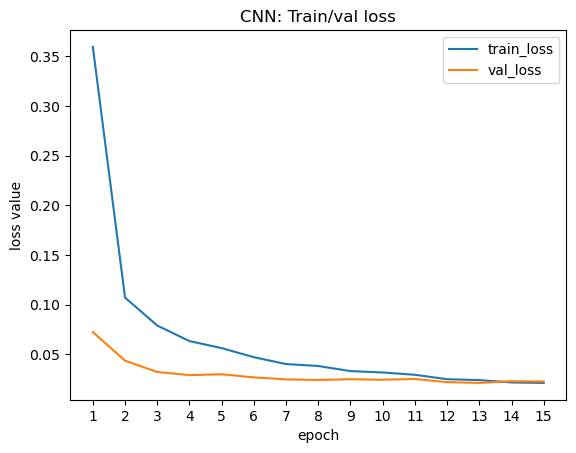

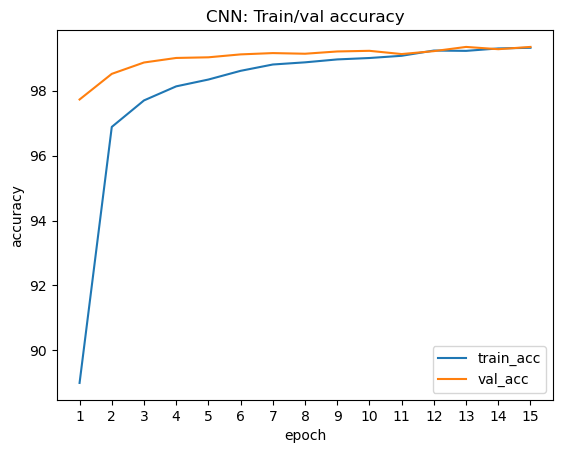

In [9]:
# visualize results
plot(train_losses, val_losses, train_acc, val_acc, title='CNN')


In [10]:
# Evaluate on last model
val_loss, val_accuracy = evaluate(model, val_loader, criterion)
print('CNN MNIST. Validation loss: {:.4f}, validation accuracy: {:.4f}'.format(val_loss, val_accuracy))


CNN MNIST. Validation loss: 0.0227, validation accuracy: 99.3500


#### 3.3 **(2pts) Use the `visualize_conv()` function provided below to observe how changing the kernel size, stride, and padding affects the appearance and resolution of an MNIST image after a convolution.**

Call the function multiple times on the `x` image defined in Exercise 3.1, modifying each of the following parameters at least once: `kernel_size`, `stride`, `padding`


💡 **Tip:** Try extreme or unexpected values to see how they affect the output. You don’t have to get a ✨ *good* ✨ result, this is all about exploring and learning!

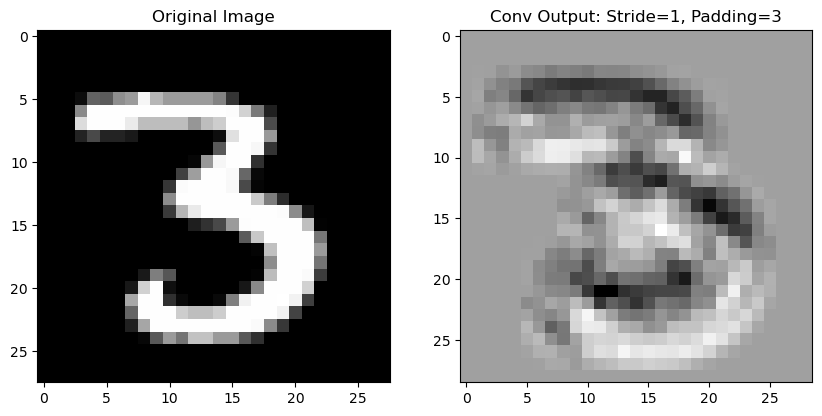

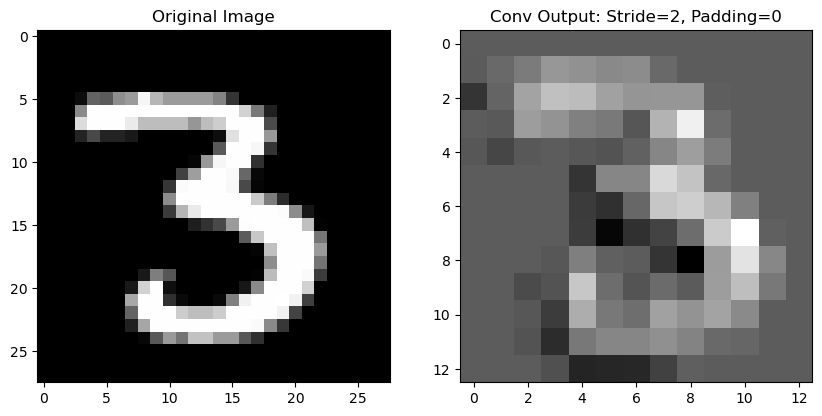

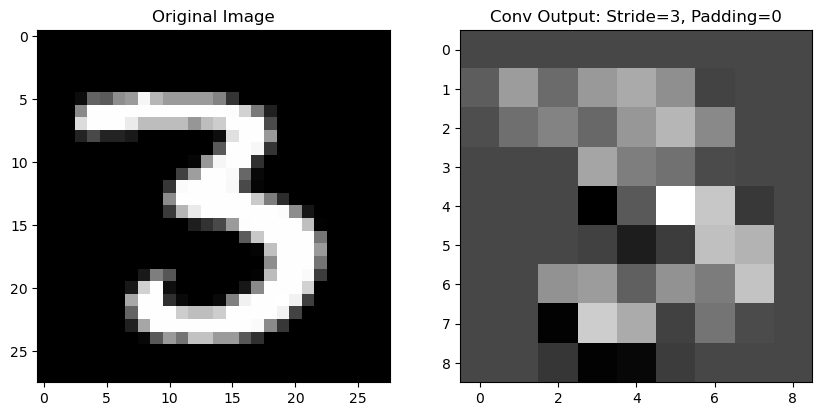

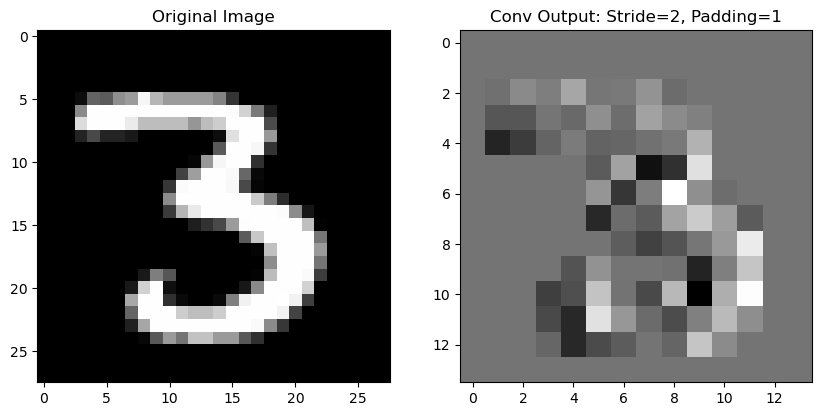

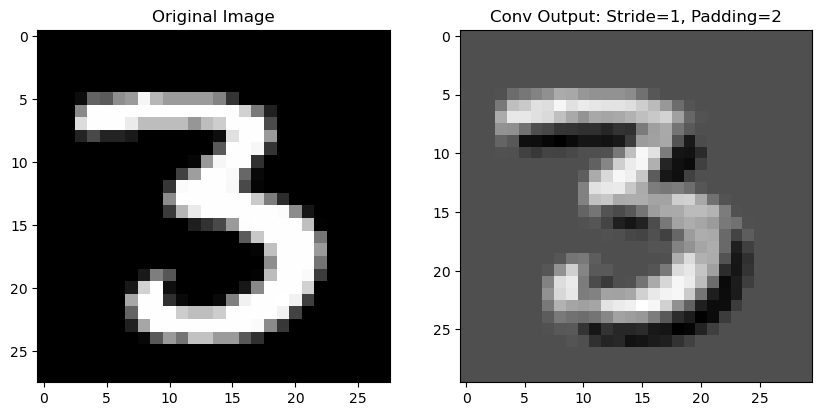

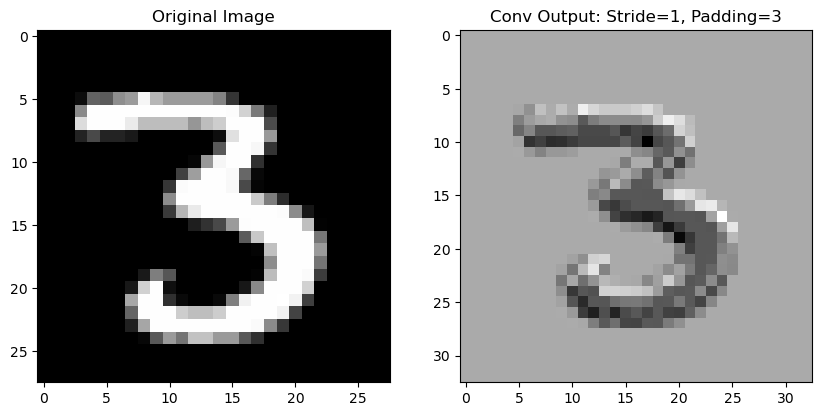

In [11]:
# Define a function to apply convolution and plot the result
def visualize_conv(image, kernel_size=3, stride=1, padding=0):
    # Define the convolutional layer
    conv_layer = nn.Conv2d(1, 1, kernel_size=kernel_size, stride=stride, padding=padding)
    
    # Apply the convolution (unsqueeze to add batch and channel dimension)
    output = conv_layer(image)
    
    # Remove batch and channel dims for display
    output = output.squeeze().detach().numpy()

    # Plot the original and convolved images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(image.squeeze(), cmap='gray')
    ax[0].set_title("Original Image")
    
    ax[1].imshow(output, cmap='gray')
    ax[1].set_title(f"Conv Output: Stride={stride}, Padding={padding}")
    
    plt.show()

# Try different combinations of stride and padding
visualize_conv(x,kernel_size=6,stride=1,padding=3) # large / blurry edges (large kernel), small grain/pixel, large kernel captures broader context
visualize_conv(x,4,2,0) # reduce output/ downsampled (stride) broader pixels/grain, less resolution
visualize_conv(x,4,3,0) # reduce output size more / larger grain/pixel even less details/ resolution
visualize_conv(x,3,2,1) # smaller grain but with higher details/contrast (smaller kernel) padding help to not reduce too much the output size
visualize_conv(x,3,1,2) # smaller grain/ sharper edges (smaller kernel) still a bit blurry/broad features,keep resolution with stride =1.
visualize_conv(x,2,1,3) # more details (smallest kernel), sharper edges, maintain size of feature map with padding, keep resolution with stride =1.


#### 3.5 **(4pts) Experiment with different architectural choices including parameters like stride, padding, and kernel size. Observe how they affect the model’s behavior and performance.**

1. **Create a new `nn.Module` class with a different architecture than the one from Exercise 3.2.**
    - **Start by modifying the stride and padding** in at least one of your convolutional layers.
    - You can also explore additional changes to see how they affect performance, such as:
        - Adjusting the kernel size
        - Changing the number of convolutional layers
        - Trying different activation functions
        - Adding Dropout, Batch Normalization, or other regularization techniques

2. **Training & Evaluation:**
    - Train your custom model on `MNIST` (loaded above).
    - Evaluate its performance on the validation set.
    
    Don’t worry if the results are worse than before, this is all about experimentation 🧪

3. **Reflection (2–4 sentences):**
    - In a markdown cell, answer the following:
        - What changes did you make and why?
        - What did you expect to happen?
        - What actually happened?

💡 **Hint:** You’ll need to recalculate the input size for your first fully connected (Linear) layer. Here are three ways to do it:

1. Manual Calculation: Compute the size of the feature map after all convolution and pooling layers by hand, then hard-code the value in your `Linear` layer.

2. Dynamic Calculation: Let PyTorch compute it for you using a dummy input:
```
with torch.no_grad():
    dummy_input = torch.zeros(1, 1, 28, 28)  # Assuming MNIST input shape (1 channel, 28x28)
    x = self.pool1(self.relu(self.conv1(dummy_input)))
    x = self.pool2(self.relu(self.conv2(x)))
    flattened_size = x.view(1, -1).shape[1]
```
This helps avoid errors when you tweak the architecture later.

3. Use [`LazyLinear`](https://pytorch.org/docs/stable/generated/torch.nn.LazyLinear.html): This special layer infers the input size the first time it sees data. You don’t need to specify the input features:
```
self.fc1 = nn.LazyLinear(128)
```
⚠️ This option is simple but it may cause issues.

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1/15: train_loss: 0.1234, train_accuracy: 97.5583, val_loss: 0.0330, val_accuracy: 99.0600


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 2/15: train_loss: 0.0403, train_accuracy: 98.8833, val_loss: 0.0315, val_accuracy: 98.9200


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 3/15: train_loss: 0.0315, train_accuracy: 99.0517, val_loss: 0.0189, val_accuracy: 99.4100


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 4/15: train_loss: 0.0266, train_accuracy: 99.2433, val_loss: 0.0277, val_accuracy: 99.0200


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 5/15: train_loss: 0.0223, train_accuracy: 99.3650, val_loss: 0.0174, val_accuracy: 99.3800


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 6/15: train_loss: 0.0205, train_accuracy: 99.3667, val_loss: 0.0237, val_accuracy: 99.2300


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 7/15: train_loss: 0.0176, train_accuracy: 99.4900, val_loss: 0.0196, val_accuracy: 99.3400


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 8/15: train_loss: 0.0151, train_accuracy: 99.5500, val_loss: 0.0146, val_accuracy: 99.5800


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 9/15: train_loss: 0.0142, train_accuracy: 99.5283, val_loss: 0.0164, val_accuracy: 99.4800


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 10/15: train_loss: 0.0133, train_accuracy: 99.5817, val_loss: 0.0173, val_accuracy: 99.4200


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 11/15: train_loss: 0.0109, train_accuracy: 99.6550, val_loss: 0.0136, val_accuracy: 99.4900


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 12/15: train_loss: 0.0096, train_accuracy: 99.7033, val_loss: 0.0179, val_accuracy: 99.4000


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 13/15: train_loss: 0.0095, train_accuracy: 99.7167, val_loss: 0.0190, val_accuracy: 99.3400


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 14/15: train_loss: 0.0094, train_accuracy: 99.7050, val_loss: 0.0210, val_accuracy: 99.3700


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 15/15: train_loss: 0.0082, train_accuracy: 99.7200, val_loss: 0.0184, val_accuracy: 99.5200
CNN MNIST. Validation loss: 0.0184, validation accuracy: 99.5200


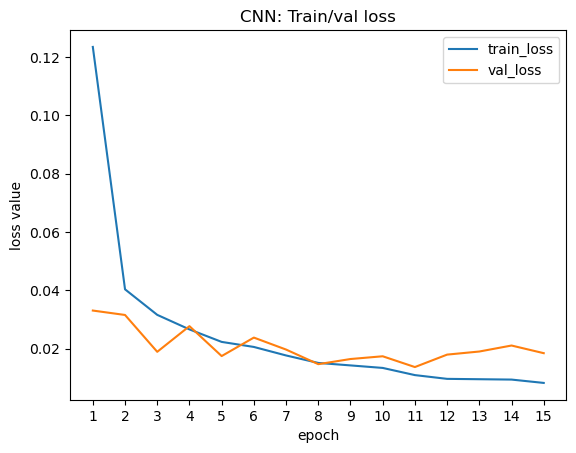

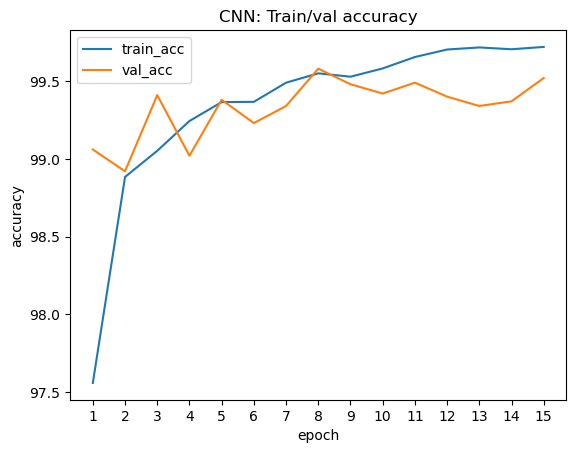

In [12]:
class MyCNNModel(nn.Module):
    def __init__(self):
        super(MyCNNModel, self).__init__()

        #Convolutional layers
        self.conv_layer1 = nn.Conv2d(1, 32, 3)
        self.conv_layer2 = nn.Conv2d(32, 64, 3)
        self.conv_layer3 = nn.Conv2d(64, 128, 3)

        # Pooling layer
        self.pool1= nn.MaxPool2d(kernel_size=(2, 2),stride=1, padding=1)
        self.pool2= nn.MaxPool2d(kernel_size=(3, 3),stride=2, padding=1)
        self.pool3= nn.MaxPool2d(kernel_size=(4, 4),stride=1, padding=2)

        # Flattening, Activation, Regularization
        self.flatten= nn.Flatten(1)
        self.lrelu= nn.LeakyReLU(0.2) # instead of relu take some negative value, neurons stay active for more values.
        self.relu= nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.batchnorm1d= nn.BatchNorm1d(128)

        # Full connected layers
        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, 28, 28)  # Assuming MNIST input shape (1 channel, 28x28)
            x = self.pool1(self.lrelu(self.conv_layer1(dummy_input)))
            x = self.pool2(self.lrelu(self.conv_layer2(x)))
            x = self.pool3(self.lrelu(self.conv_layer3(x)))
            flattened_size = x.view(1, -1).shape[1]
        #print(f"The flattened size is: {flattened_size}") # -> less neurones than before, stride + larger kernels

        self.fc_layer1=nn.Linear(flattened_size,128)
        self.fc_layer2 = nn.Linear(128, 10)

    def forward(self,x):

        x = self.pool1(self.lrelu(self.conv_layer1(x)))
        x = self.pool2(self.lrelu(self.conv_layer2(x)))
        x = self.pool3(self.lrelu(self.conv_layer3(x)))
        x = self.flatten(x)
        x = self.dropout(self.relu(self.batchnorm1d(self.fc_layer1(x))))
        x = self.fc_layer2(x)

        return x

# instantiate the model
model = MyCNNModel()
model.to(device)

# loss, optimizer, epochs
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)
n_epochs = 15 # you can lower this if it's taking too long to run

# train model
train_losses, val_losses, train_acc, val_acc = train(model, train_loader, val_loader, optimizer, n_epochs, criterion)

# visualize results
plot(train_losses, val_losses, train_acc, val_acc, title='CNN')

# Evaluate on last model
val_loss, val_accuracy = evaluate(model, val_loader, criterion)
print('CNN MNIST. Validation loss: {:.4f}, validation accuracy: {:.4f}'.format(val_loss, val_accuracy))

Changes in Architecture:
   - Added a third/last convolutional layer: with a modified maxpool kernel_size, stride and padding and more neurons on this new layer, and modified kernel, stride and padding on the other conv layers.
   - Modified activation function with leaky Relu in the 3 convolutional layers,
   - Added batch normalization to fully connected layer 1.

Expected:
   - Faster convergence of training, higher accuracy for training and validation (better generalization), lower losses. (batchnorm + more conv layers)
   - Some overfitting with too much complexity: depth and features/details learned. In the conv. layers: the larger kernel (with padding) should get us coarser details/features/edges of the images and the smaller kernel the finer details. The stride=2 should shrink the feature map by half and the padding compensate a bit this shrinking. leaky relu let more neurons active: more depth.

Observed:
   - Training convergence is indeed faster and training accuracy is higher (loss is lower) than before. The validation accuracy and losses are a bit better than before (0.2%): generalization is a bit improved.
   - Training accuracy is still increasing with epochs and the validation not so much meaning we are probably overfitting the data after 7-8 epochs. (validation loss tends to stagnate too from 7-8 epochs)

In [14]:
points

29

---
**Congratulations on completing this assignment!** 🎉  

You’ve taken your first steps into the world of Convolutional Neural Networks! By experimenting with convolutional layers, max pooling, stride, padding, dropout, and flattening, you’ve built and evaluated models that can classify handwritten digits from the MNIST dataset.

Great work, and happy coding! 🚀💻